<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/course1_3_CV_CNN_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision as tv
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm.auto import tqdm

In [ ]:
train_data = datasets.FashionMNIST(
    root='datasets',
    train=True,
    transform=ToTensor(),
    download=True
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10548289.70it/s]


Extracting datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to datasets/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 206154.38it/s]


Extracting datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to datasets/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3759975.61it/s]


Extracting datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to datasets/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5829448.43it/s]

Extracting datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to datasets/FashionMNIST/raw



In [ ]:
test_data = datasets.FashionMNIST(
    root='datasets',
    train=False,
    transform=ToTensor(),
    download=True
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
class_labels = train_data.classes
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
img, label = train_data[10]
img.shape, label

(torch.Size([1, 28, 28]), 0)

Text(0.5, 1.0, 'T-shirt/top')

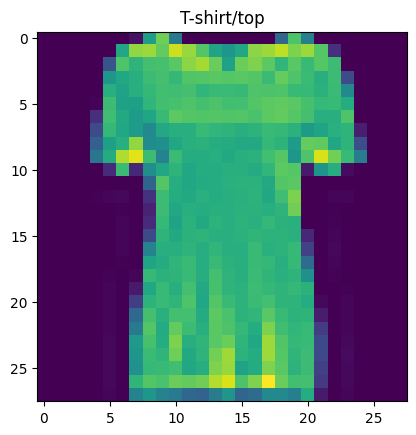

In [ ]:
plt.imshow(img.squeeze())
plt.title(class_labels[label])


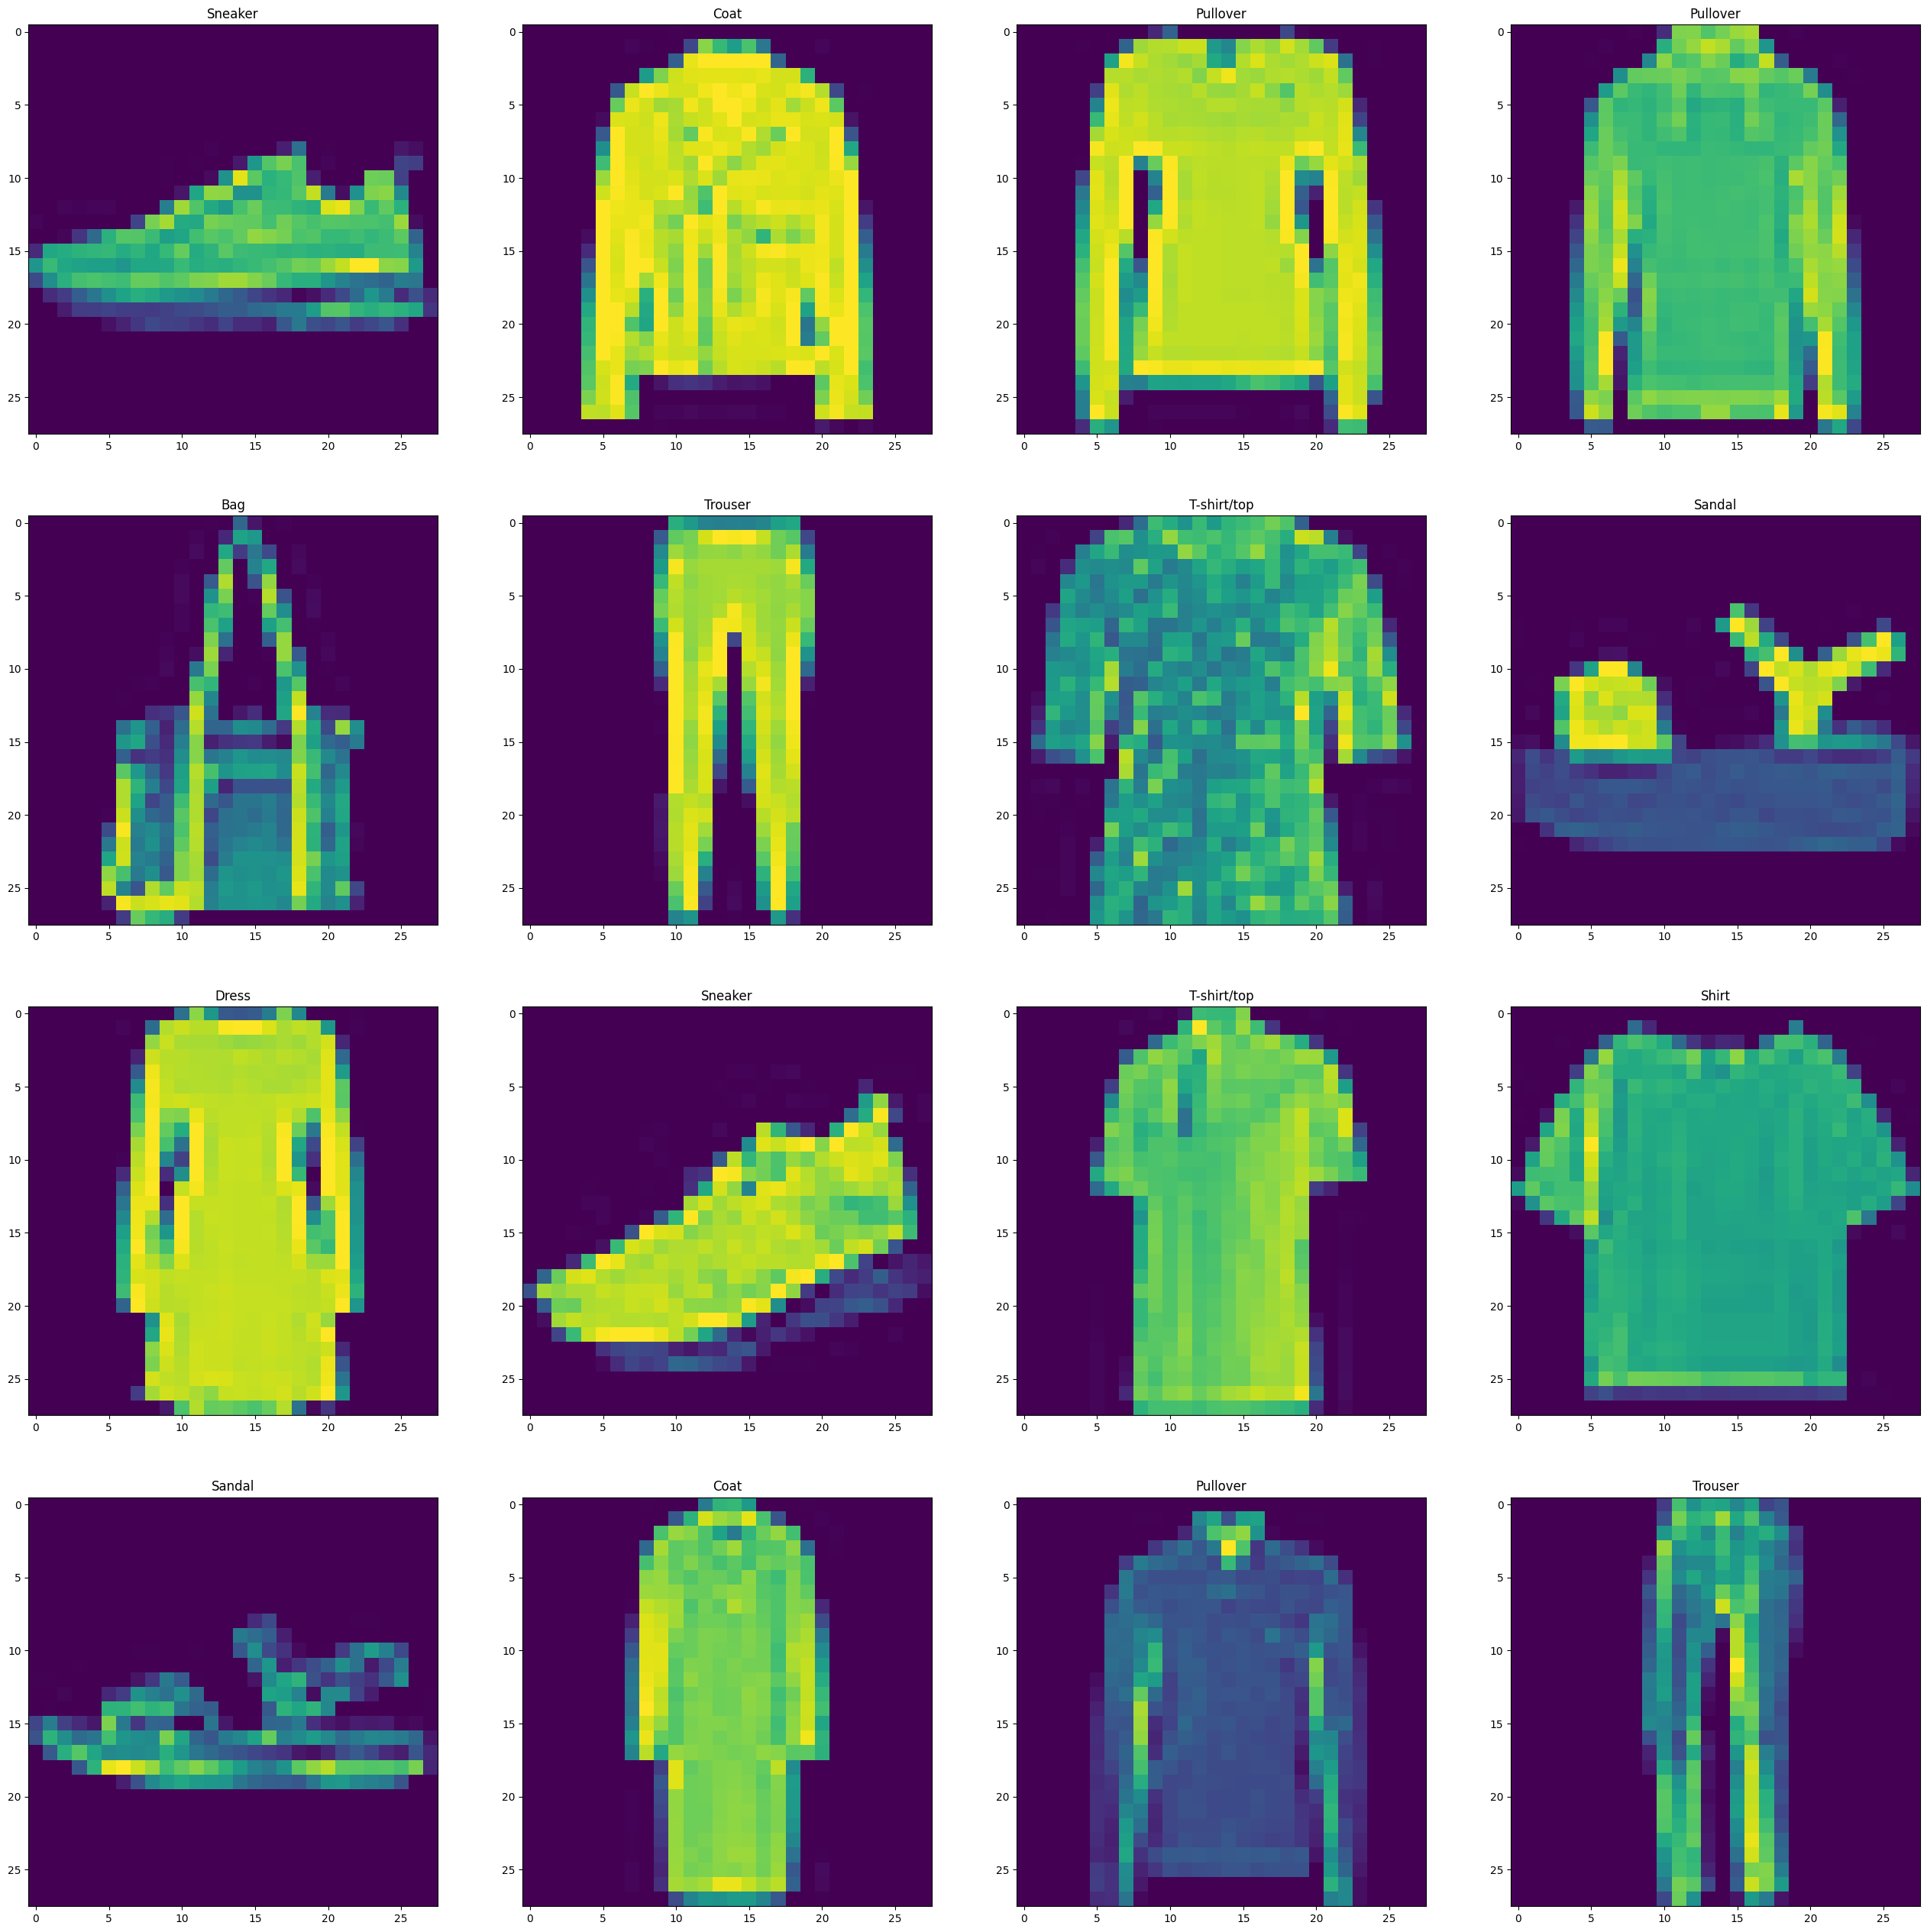

In [ ]:
torch.manual_seed(6)
plt.figure(figsize=(32,32))
for i in range(1,17):
    plt.subplot(4,4,i)
    img, label = train_data[random.randint(0,len(train_data)-1)]
    plt.imshow(img.squeeze())
    plt.title(class_labels[label])

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [ ]:
train_dataloader

In [ ]:
features_batch, labels_batch = next(iter(train_dataloader))

In [ ]:
features_batch.shape

torch.Size([32, 1, 28, 28])

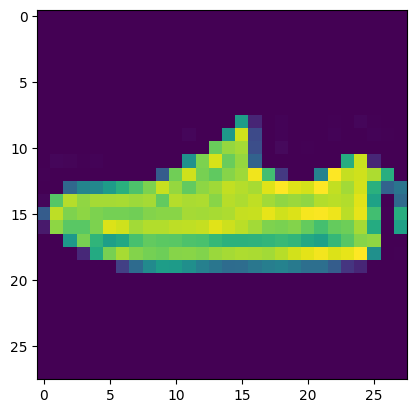

In [ ]:
img = features_batch[2]
plt.imshow(img.squeeze())

In [ ]:
#model

class FashionMNIST_V0 (nn.Module):
    def __init__(self, input_features,
                 output_features,
                 hidden_units):
        super().__init__()

        self.model_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=hidden_units*2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units*2,
                      out_features=output_features)

        )

    def forward(self, x:torch.Tensor):
        return self.model_stack(x)

In [ ]:
torch.manual_seed(6)
model_0 = FashionMNIST_V0(input_features=28*28,
                          output_features=len(class_labels),
                          hidden_units=16)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
fn_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.05)

In [ ]:
def fn_accuracy(true_label, pred_label):
    return torch.eq(true_label,pred_label).sum().item()/len(true_label)*100

In [ ]:
test_loss_arr = []
train_loss_arr = []
test_acc_arr = []
epoch_arr = []

In [ ]:
torch.manual_seed(6)
#Train

epochs = 10

for epoch in tqdm(range(epochs)):
    train_loss = 0

    model_0.train()

    for batch, (X, y) in enumerate(train_dataloader):

        y_pred = model_0(X)
        #print(y_pred.shape)
        loss = fn_loss(y_pred,y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        train_loss += loss

    train_loss /= len(train_dataloader)

    train_loss_arr.append(train_loss)

    epoch_arr.append(epoch)

    model_0.eval()

    test_loss = 0
    test_acc = 0
    with torch.inference_mode():
        for X, y in (test_dataloader):
            test_pred = model_0(X)

            loss = fn_loss(test_pred,y)

            test_loss += loss

            acc = fn_accuracy(y, torch.argmax(torch.softmax(test_pred, dim=1), dim=1))

            test_acc += acc

        test_loss /= len(test_dataloader)

        test_loss_arr.append(test_loss)

        test_acc /= len(test_dataloader)

        test_acc_arr.append(test_acc)

    print(f'Epoch: {epoch} || batch: {batch} || train loss = {train_loss:.4f} || test loss = {test_loss:.4f} || test accuracy = {test_acc:.2f}%')



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 || batch: 1874 || train loss = 0.7153 || test loss = 0.5753 || test accuracy = 77.68%
Epoch: 1 || batch: 1874 || train loss = 0.4731 || test loss = 0.4667 || test accuracy = 83.72%
Epoch: 2 || batch: 1874 || train loss = 0.4282 || test loss = 0.4325 || test accuracy = 84.62%
Epoch: 3 || batch: 1874 || train loss = 0.4029 || test loss = 0.4498 || test accuracy = 83.75%
Epoch: 4 || batch: 1874 || train loss = 0.3853 || test loss = 0.4173 || test accuracy = 85.13%
Epoch: 5 || batch: 1874 || train loss = 0.3711 || test loss = 0.4032 || test accuracy = 85.76%
Epoch: 6 || batch: 1874 || train loss = 0.3602 || test loss = 0.4389 || test accuracy = 84.35%
Epoch: 7 || batch: 1874 || train loss = 0.3508 || test loss = 0.4039 || test accuracy = 85.51%
Epoch: 8 || batch: 1874 || train loss = 0.3419 || test loss = 0.3765 || test accuracy = 86.39%
Epoch: 9 || batch: 1874 || train loss = 0.3352 || test loss = 0.3918 || test accuracy = 86.14%


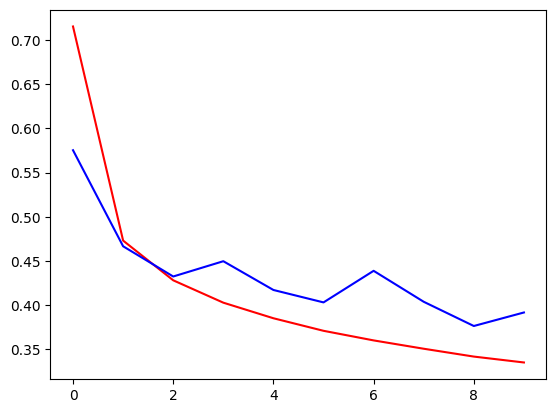

In [ ]:
plt.plot(torch.tensor(epoch_arr), torch.tensor(train_loss_arr), c='r')
plt.plot(torch.tensor(epoch_arr), test_loss_arr, c='b')
#plt.plot(torch.tensor(epoch_arr), test_acc_arr, c='g')

5 tensor([5])
4 tensor([4])
3 tensor([3])
6 tensor([6])
5 tensor([5])
1 tensor([1])
1 tensor([1])
9 tensor([7])
7 tensor([7])
3 tensor([4])
2 tensor([3])
2 tensor([3])
4 tensor([2])
4 tensor([4])
2 tensor([0])
1 tensor([1])


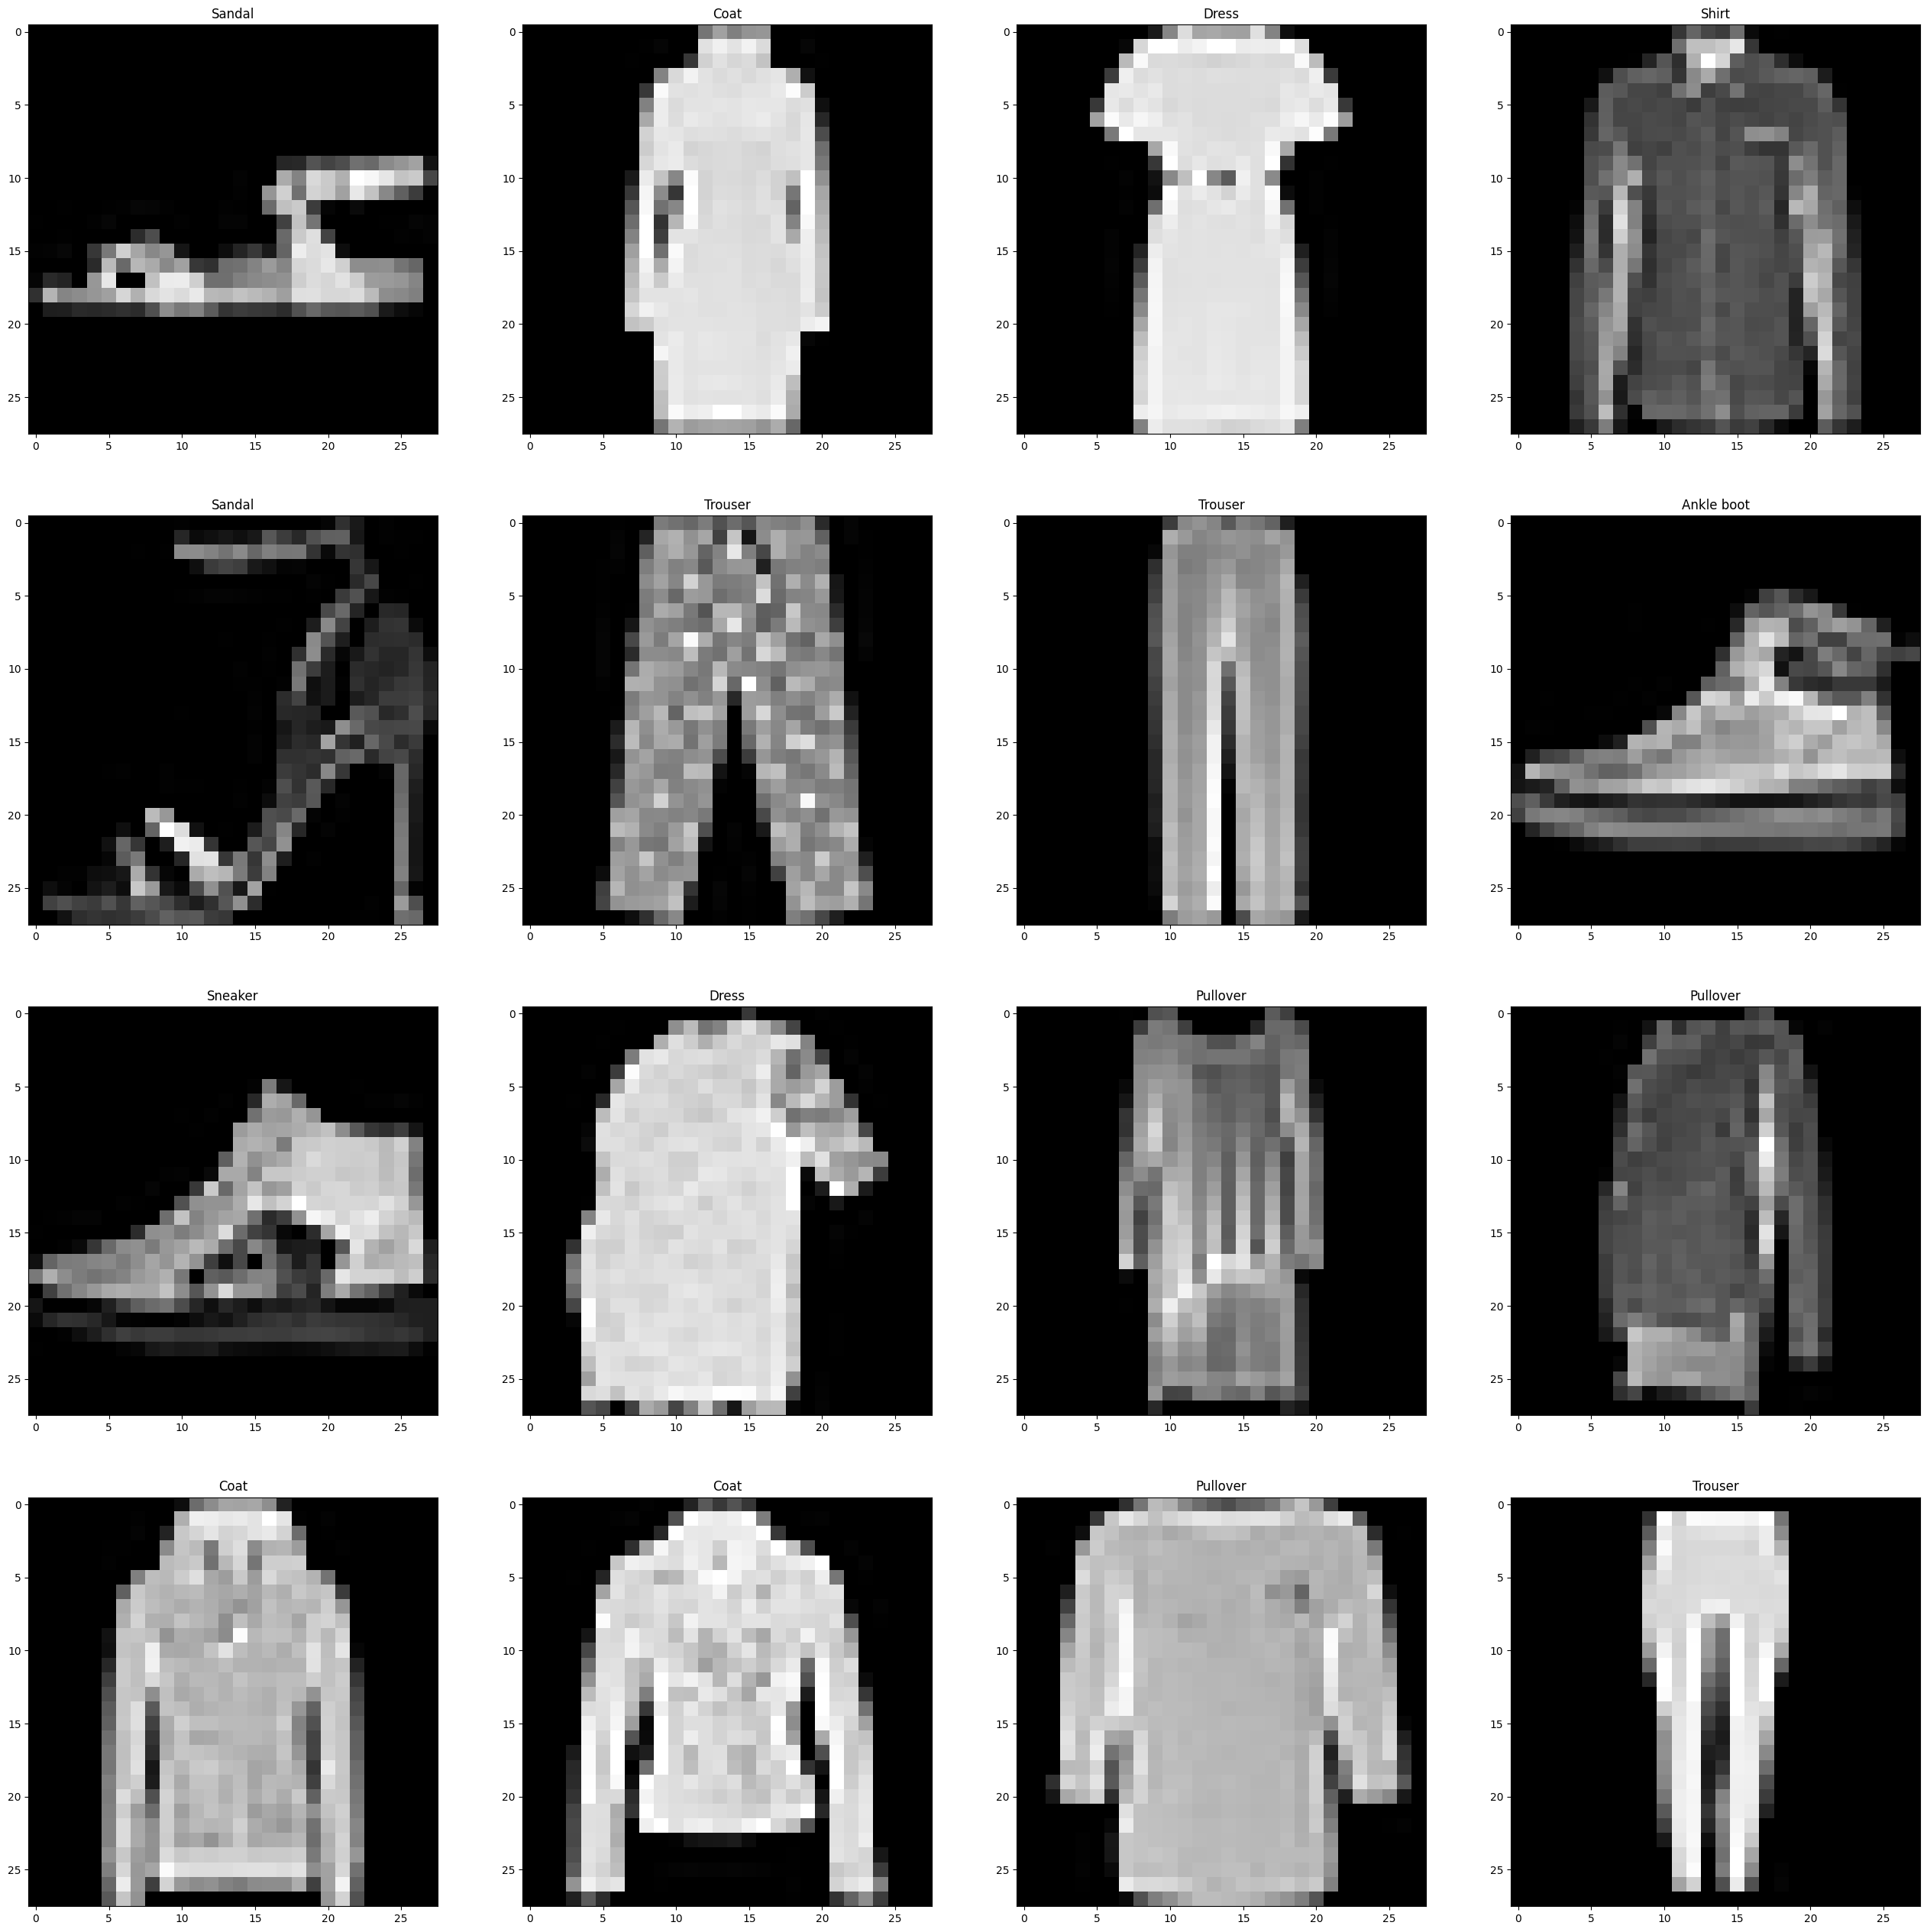

In [ ]:
torch.manual_seed(6)
model_0.eval()

img_array = []
labels_array = []
plt.figure(figsize=(32,32))
for i in range(1,17):
    plt.subplot(4,4,i)

    img, label = test_data[random.randint(0,len(test_data))]

    img_array.append(img)
    with torch.inference_mode():
        logit = model_0(img)

        pred_label = torch.argmax(torch.softmax(logit, dim=1), dim=1)
        labels_array.append(pred_label)

    print(label, pred_label)
    plt.imshow(img.squeeze(), cmap = 'gray')
    plt.title(class_labels[label])

In [ ]:
len(img_array), labels_array

(16,
 [tensor([5]),
  tensor([4]),
  tensor([3]),
  tensor([6]),
  tensor([5]),
  tensor([1]),
  tensor([1]),
  tensor([7]),
  tensor([7]),
  tensor([4]),
  tensor([3]),
  tensor([3]),
  tensor([2]),
  tensor([4]),
  tensor([0]),
  tensor([1])])

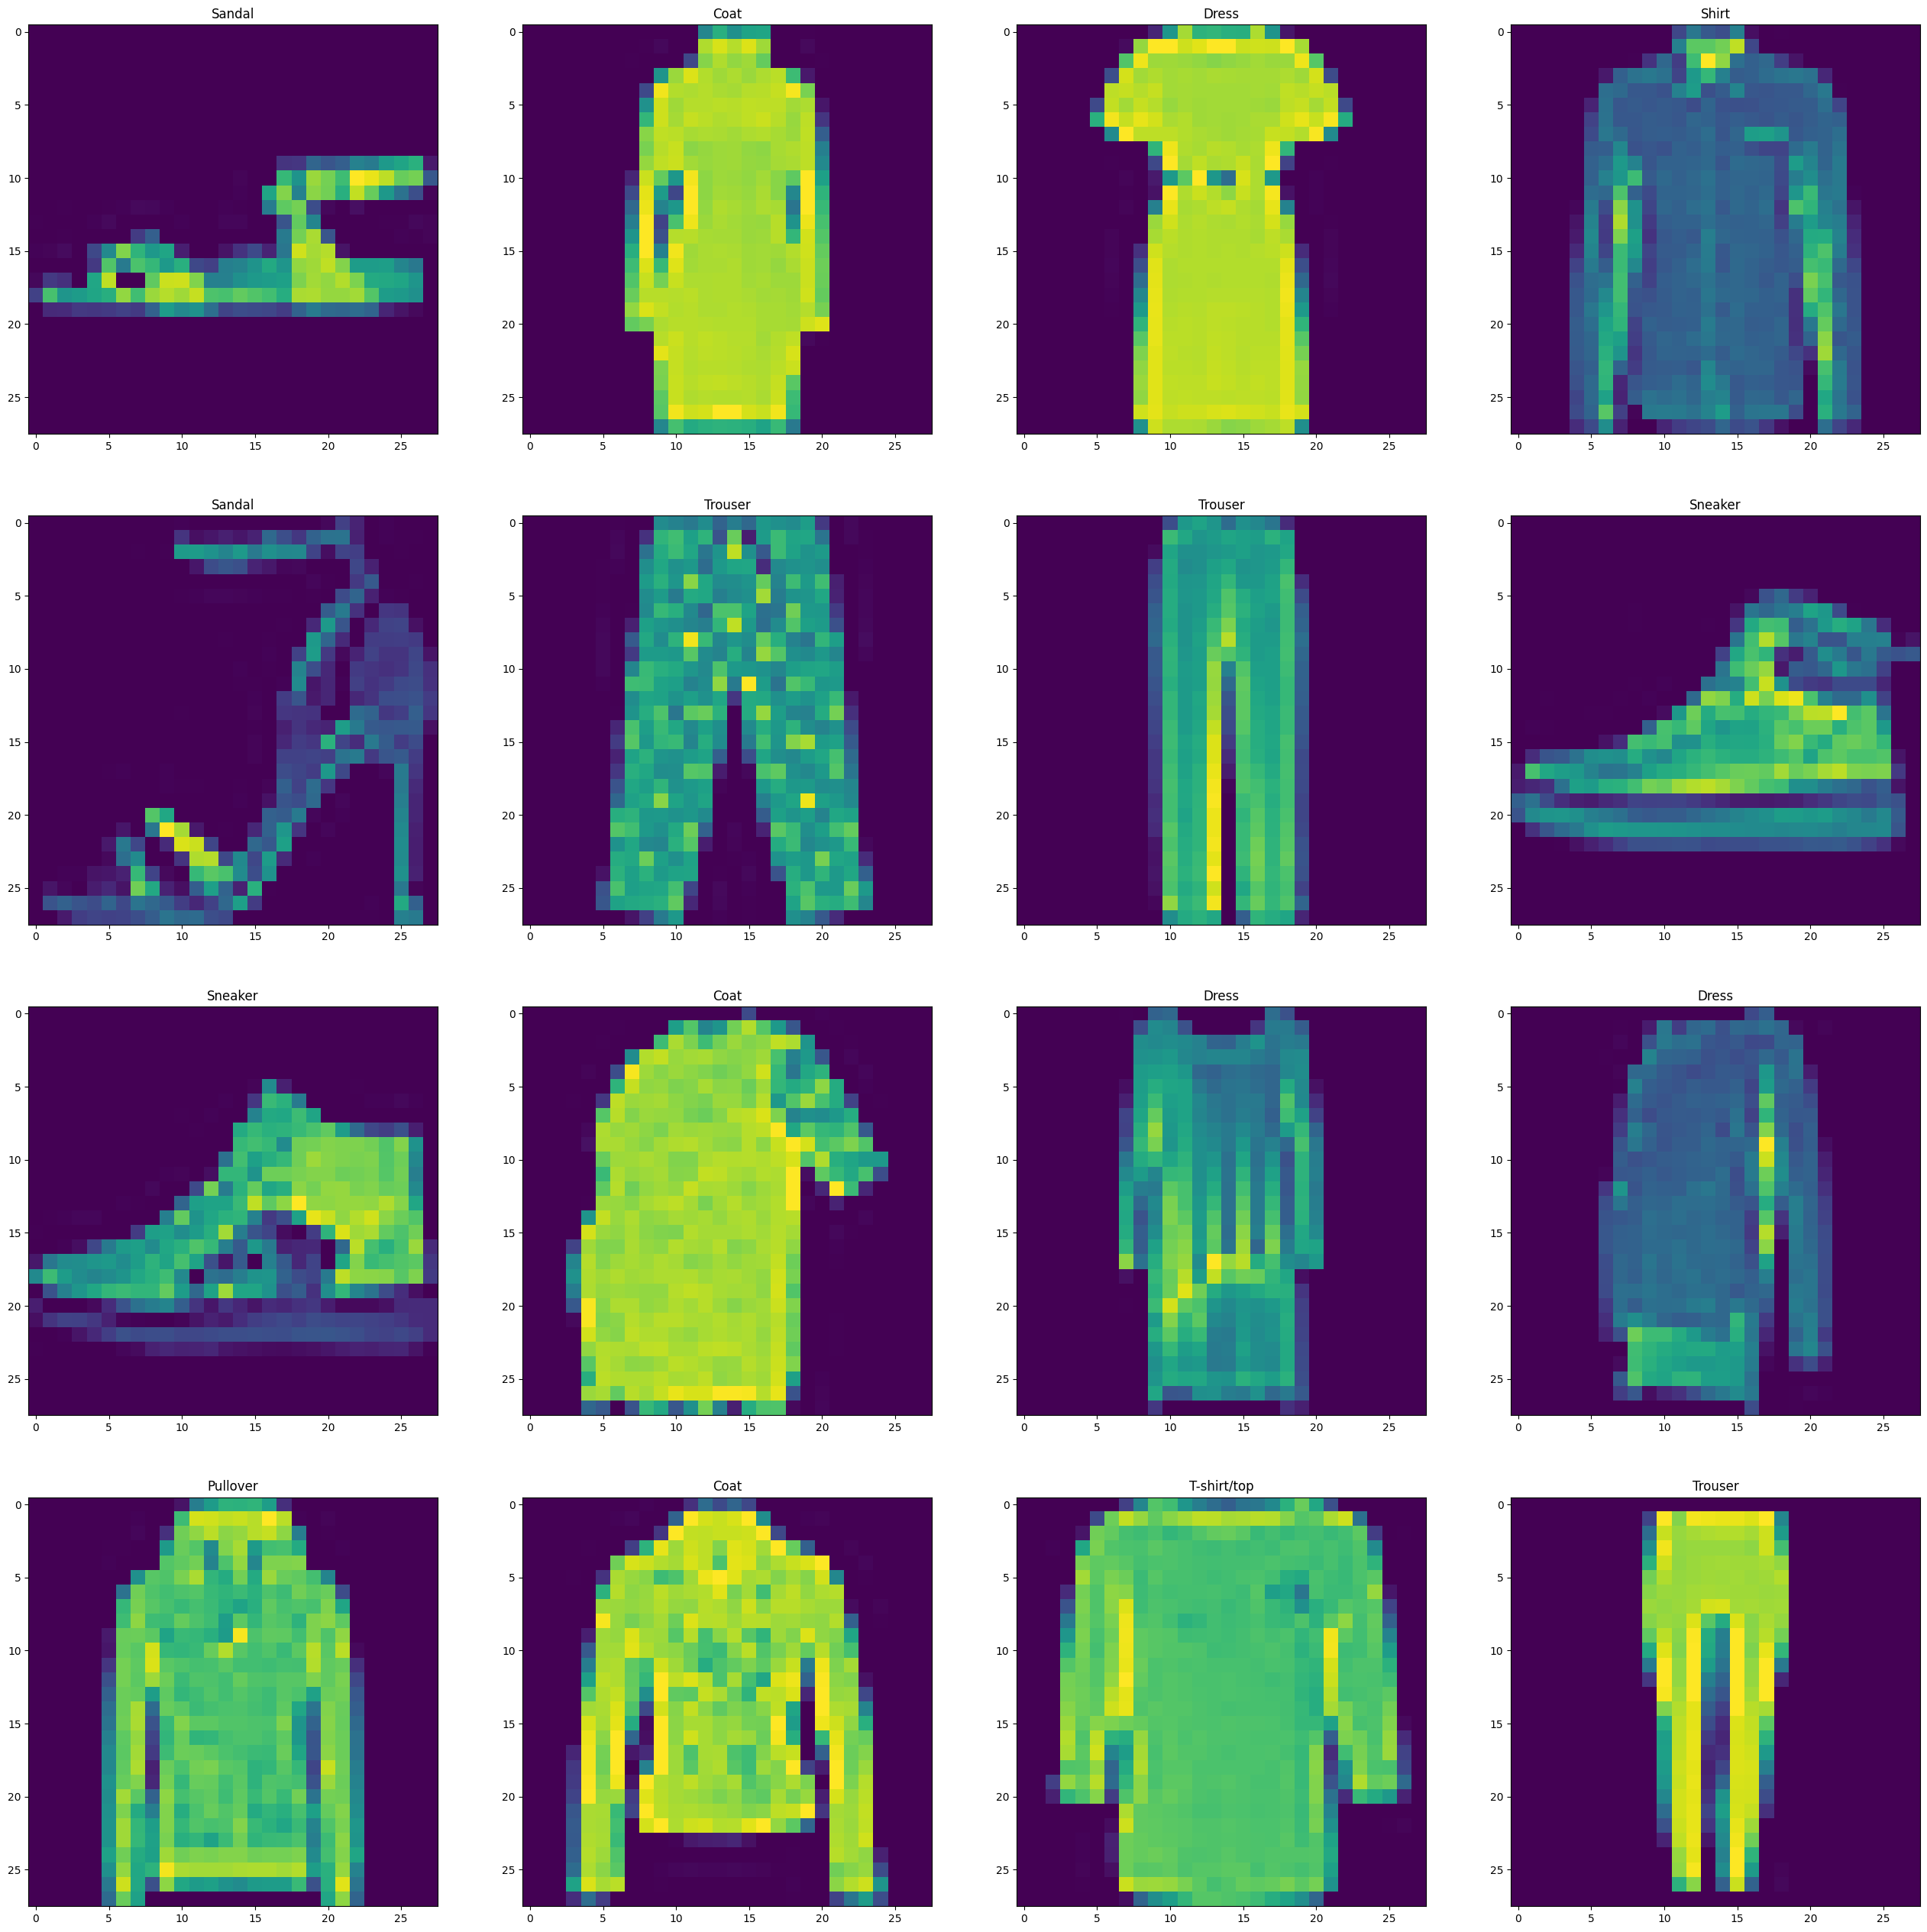

In [ ]:
plt.figure(figsize=(32,32))
for i in range(1,17):
    plt.subplot(4,4,i)

    plt.imshow(img_array[i-1].squeeze())
    plt.title(class_labels[labels_array[i-1].item()])

In [ ]:
from pathlib import Path

In [ ]:
PATH_NAME = Path('models')

In [ ]:
PATH_NAME.mkdir(parents=True, exist_ok=True)
FILE_NAME = 'CV_FASHION_MNIST_LinearClassification.pth'
FILE_PATH = PATH_NAME / FILE_NAME
torch.save(obj=model_0.state_dict(),f=FILE_PATH)

In [ ]:
img = torch.randn(64,64,3)

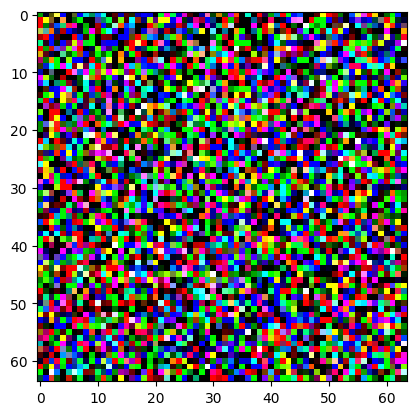

In [ ]:
plt.imshow(img)

### CNN model

In [ ]:
class CNN_VGG(nn.Module):
    def __init__(self):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=8,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU()
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=8,
                      out_channels=16,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=16,
                      out_channels=16,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU()
        )

        self.block_4 = nn.Sequential(
            nn.Conv2d(in_channels=16,
                      out_channels=16,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.block_5 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=7*7*16,
                      out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16,
                      out_features=10)
        )

        self.workflow = nn.Sequential(self.block_1, self.block_2, self.block_3, self.block_4, self.block_5)
    def forward(self, x):
        x = self.block_1(x)

        x = self.block_2(x)

        x = self.block_3(x)

        x = self.block_4(x)

        x = self.block_5(x)
        return x

In [ ]:
torch.manual_seed(6)
model = CNN_VGG().to(device)

In [ ]:
imgs = torch.randn(32,1,28,28)

In [ ]:
m1 = nn.Conv2d(in_channels=1,
                      out_channels=8,
                      kernel_size=3,
                      stride=1,
                      padding=1)

In [ ]:
pred = m1(imgs)
pred.shape

torch.Size([32, 8, 28, 28])

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0


  model.train()


  for batch, (X, y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)


    y_pred = model(X)


    loss = fn_loss(y_pred, y)
    train_loss += loss
    train_acc += fn_accuracy(true_label=y,
                             pred_label=y_pred.argmax(dim=1))


    optimizer.zero_grad()


    loss.backward()


    optimizer.step()


  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  test_loss, test_acc = 0, 0


  model.eval()


  with torch.inference_mode():
    for X, y in data_loader:

      X, y = X.to(device), y.to(device)


      test_pred = model(X)


      test_loss += fn_loss(test_pred, y)
      test_acc += accuracy_fn(true_label=y,
                              pred_label=test_pred.argmax(dim=1))


    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [ ]:
fn_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [ ]:
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model,
             data_loader=train_dataloader,
             loss_fn=fn_loss,
             optimizer=optimizer,
             accuracy_fn=fn_accuracy,
             device=device)
  test_step(model=model,
            data_loader=test_dataloader,
            loss_fn=fn_loss,
            accuracy_fn=fn_accuracy,
            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.70829 | Train acc: 73.16%
Test loss: 0.46095 | Test acc: 82.42%

Epoch: 1
-------
Train loss: 0.35102 | Train acc: 87.17%
Test loss: 0.34541 | Test acc: 87.37%

Epoch: 2
-------
Train loss: 0.30277 | Train acc: 88.91%
Test loss: 0.30607 | Test acc: 88.70%



In [ ]:
torch.manual_seed(6)
#Train

epochs = 10

for epoch in tqdm(range(epochs)):
    train_loss = 0

    model.train()

    for batch, (X, y) in enumerate(train_dataloader):

        X, y = X.to(device), y.to(device)
        #print(X.shape)
        y_pred = model(X)
        #print(y_pred.shape)
        loss = fn_loss(y_pred,y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        train_loss += loss

    train_loss /= len(train_dataloader)

    train_loss_arr.append(train_loss)

    epoch_arr.append(epoch)

    model.eval()

    test_loss = 0
    test_acc = 0
    with torch.inference_mode():
        for X, y in (test_dataloader):

            X, y = X.to(device), y.to(device)
            test_pred = model(X)

            loss = fn_loss(test_pred,y)

            test_loss += loss

            acc = fn_accuracy(y, torch.argmax(torch.softmax(test_pred, dim=1), dim=1))

            test_acc += acc

        test_loss /= len(test_dataloader)

        test_loss_arr.append(test_loss)

        test_acc /= len(test_dataloader)

        test_acc_arr.append(test_acc)

    print(f'Epoch: {epoch} || batch: {batch} || train loss = {train_loss:.4f} || test loss = {test_loss:.4f} || test accuracy = {test_acc:.2f}%')


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 || batch: 1874 || train loss = 0.2783 || test loss = 0.3284 || test accuracy = 88.00%
Epoch: 1 || batch: 1874 || train loss = 0.2632 || test loss = 0.2805 || test accuracy = 89.76%
Epoch: 2 || batch: 1874 || train loss = 0.2488 || test loss = 0.2914 || test accuracy = 89.26%
Epoch: 3 || batch: 1874 || train loss = 0.2364 || test loss = 0.3062 || test accuracy = 89.77%
Epoch: 4 || batch: 1874 || train loss = 0.2310 || test loss = 0.2786 || test accuracy = 89.92%
Epoch: 5 || batch: 1874 || train loss = 0.2235 || test loss = 0.2895 || test accuracy = 90.00%
Epoch: 6 || batch: 1874 || train loss = 0.2184 || test loss = 0.2716 || test accuracy = 90.39%
Epoch: 7 || batch: 1874 || train loss = 0.2115 || test loss = 0.2757 || test accuracy = 90.52%
Epoch: 8 || batch: 1874 || train loss = 0.2055 || test loss = 0.2654 || test accuracy = 90.58%
Epoch: 9 || batch: 1874 || train loss = 0.2021 || test loss = 0.2898 || test accuracy = 90.01%
